<a href="https://colab.research.google.com/github/ahihi10/Frontend_App/blob/main/Object_detection_with_Yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics opencv-python matplotlib numpy neptune

In [ ]:
import os

import cv2
import matplotlib.pyplot as plt
import neptune
from ultralytics import YOLO

In [ ]:
def init_run(tags=None):
  run = neptune.init_run(
      project="ahihi10/ahihi",
      api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIxODY5YjAzNC0zODc4LTQ0ODAtODNjOS02ZWVkZDU3ZWE2YWEifQ==",
      tags=tags,
  )
  return  run



[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/ahihi10/ahihi/e/AH-2

image 1/1 /content/drive/MyDrive/horse.jpg: 480x640 5 persons, 1 truck, 1 dog, 1 horse, 337.7ms
Speed: 17.8ms preprocess, 337.7ms inference, 32.3ms postprocess per image at shape (1, 3, 480, 640)


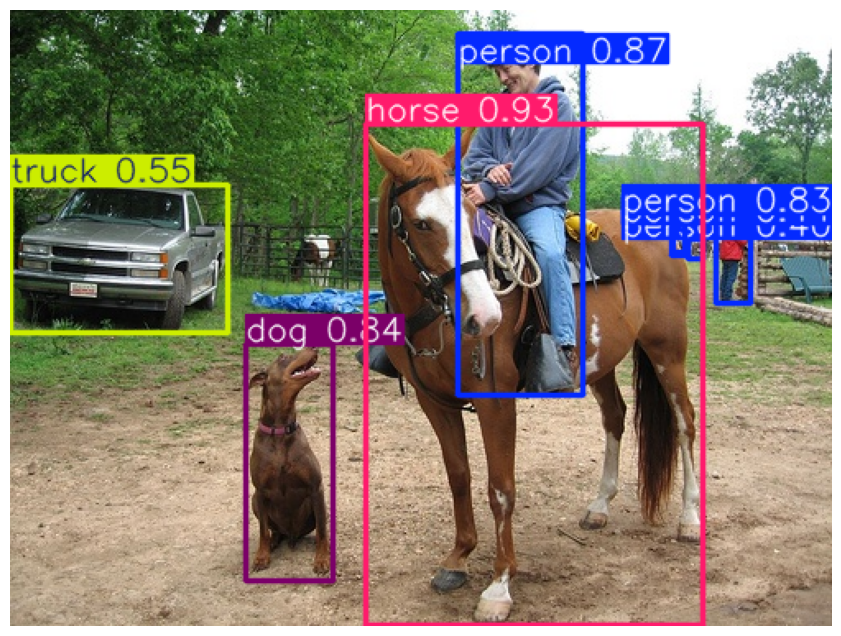

In [ ]:
MODEL_NAME = "yolo11n.pt"

model = YOLO(MODEL_NAME)

run = init_run(['yolo-detection'])

# Log model configuration
run["model/task"] = model.task
run["model/name"] = MODEL_NAME

img1_path = "/content/drive/MyDrive/horse.jpg"
img2_path = "/content/drive/MyDrive/horse.jpg"

results = model(img1_path)
# Plot and log the results
fig, ax = plt.subplots(figsize=(12, 8))

ax.imshow(cv2.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB))
ax.axis("off")

# Upload the image to Neptune
run["predictions/sample"].upload(neptune.types.File.as_image(fig))

plt.show()

In [ ]:
MODEL_NAME = "yolo11n.pt"

model = YOLO(MODEL_NAME)

run = init_run(['yolo-detection'])

# Log model configuration
run["model/task"] = model.task
run["model/name"] = MODEL_NAME

[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/ahihi10/ahihi/e/AH-3
